In [2]:
from models import *
import os
from data_set import LeucorrheaDataset
import detection.transforms as T
import detection.utils as utils
import matplotlib.pyplot as plt
import cv2
import numpy as np
import time

In [2]:
model = get_model('trained_fasterrcnn_resnet50_fpn')
model.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform()
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d()
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d()
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d()
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d()
          (relu): ReLU(inplace=True)
          (downsample): Sequential(
            (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (1): FrozenBatchNorm2d()
          )
  

In [3]:
root = "/home/ai/PycharmProjects/TrainNet/data/RecGrapReslutForNet"

In [4]:
def showImage(image):
    fig = plt.figure(figsize=(20,30), dpi=50)
    plt.imshow(image)
    plt.figure
    plt.axis('off')
    plt.show()

In [6]:
def get_transform(train):
    transforms = []
    transforms.append(T.ToTensor())
    if train:
        transforms.append(T.RandomHorizontalFlip(0.5))
    return T.Compose(transforms)

In [6]:
def draw_one_image(img,boxes,labels):
    if boxes.shape[0] == labels.shape[0]:
        for i in range(len(labels)):
            box = boxes[i,:]
            label = labels[i]
            color = (255,0,0)
            
            hight = box[3]-box[1]
            
            font_size = 0.8
            thickness = 2
            
            cv2.rectangle(img,(box[0],box[1]),(box[2],box[3]),color,thickness)
            cv2.putText(img,"cl:"+str(label),(box[0],int(box[1]+0.5*hight)),cv2.FONT_HERSHEY_SIMPLEX,
                font_size,color,thickness)
        return img
    else:
        print('the length of boxes and labels not equal!')
    

In [4]:
data_set = LeucorrheaDataset(False)

In [55]:
img,target = data_set[10]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


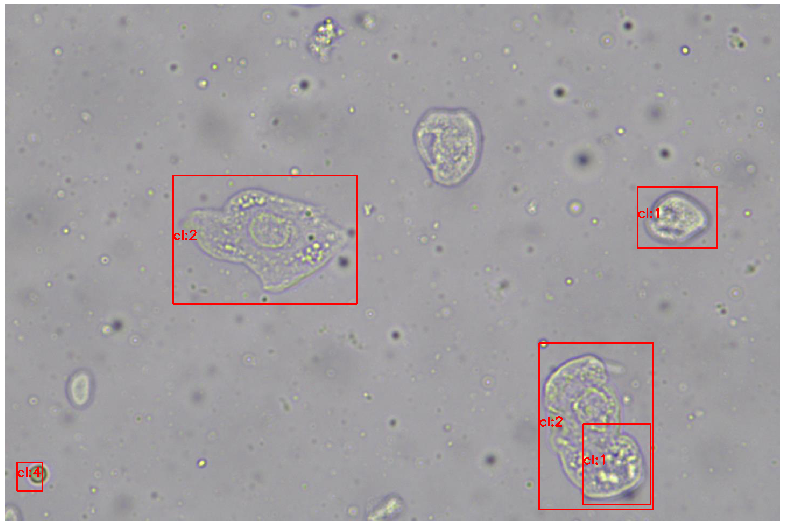

In [56]:
boxes = target['boxes'].numpy()
labels = target['labels'].numpy()
img_origin = img.numpy().transpose((1, 2, 0)).astype(np.float32).copy()
draw_one_image(img_origin,boxes,labels)
showImage(img_origin)

In [57]:
start_time = time.time()
output = model([img])
time_elapsed = time.time()-start_time
print(time_elapsed)

3.0237326622009277


In [58]:
predict_boxes = output[0]['boxes'].detach().numpy()
predcit_labels = output[0]['labels'].detach().numpy()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


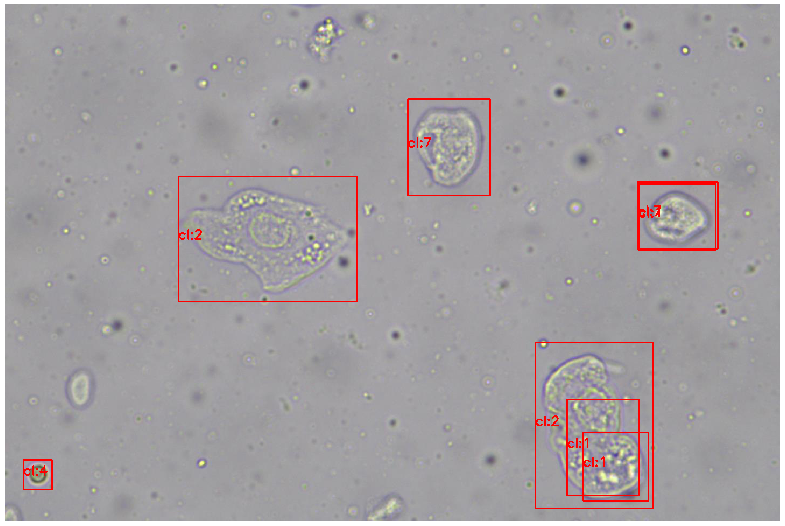

In [59]:
img_pridict = img.numpy().transpose((1, 2, 0)).astype(np.float32).copy()
draw_one_image(img_pridict,predict_boxes,predcit_labels)
showImage(img_pridict)

In [60]:
import os

In [61]:
print(os.getcwd())

/home/ai/PycharmProjects/TrainNet


In [72]:
indices = torch.randperm(len(data_set))

In [73]:
indices[0:5]

tensor([13110,  1002, 18331,  2844, 15721])

In [76]:
print(data_set[0])

(tensor([[[0.5608, 0.5608, 0.5647,  ..., 0.6275, 0.6275, 0.6275],
         [0.5569, 0.5608, 0.5608,  ..., 0.6275, 0.6275, 0.6275],
         [0.5569, 0.5569, 0.5608,  ..., 0.6275, 0.6275, 0.6275],
         ...,
         [0.6157, 0.6157, 0.6118,  ..., 0.6196, 0.6235, 0.6235],
         [0.6157, 0.6157, 0.6118,  ..., 0.6196, 0.6235, 0.6275],
         [0.6157, 0.6157, 0.6118,  ..., 0.6196, 0.6275, 0.6314]],

        [[0.5529, 0.5529, 0.5569,  ..., 0.6275, 0.6275, 0.6275],
         [0.5490, 0.5529, 0.5529,  ..., 0.6275, 0.6275, 0.6275],
         [0.5490, 0.5490, 0.5529,  ..., 0.6275, 0.6275, 0.6275],
         ...,
         [0.6118, 0.6118, 0.6078,  ..., 0.6196, 0.6235, 0.6235],
         [0.6118, 0.6118, 0.6078,  ..., 0.6196, 0.6235, 0.6275],
         [0.6118, 0.6118, 0.6078,  ..., 0.6196, 0.6275, 0.6314]],

        [[0.5569, 0.5569, 0.5608,  ..., 0.6353, 0.6353, 0.6353],
         [0.5529, 0.5569, 0.5569,  ..., 0.6353, 0.6353, 0.6353],
         [0.5529, 0.5529, 0.5569,  ..., 0.6353, 0.6353, 0

In [74]:
img,target = data_set[0:5]
print

TypeError: join() argument must be str or bytes, not 'list'

In [5]:
data_loader_test = torch.utils.data.DataLoader(
    data_set, batch_size=1, shuffle=False, num_workers=4,
    collate_fn=utils.collate_fn)

In [9]:
device = torch.device('cuda')
model.to(device)
model.train()
i =0
for images,targets in data_loader_test:
    images = list(image.to(device) for image in images)
    targets = [{k: v.to(device) for k, v in t.items()} for t in targets]
    loss_dict = model(images, targets)
    #print('loss_dict',loss_dict)
    #print('`                                                                   `')
    
    loss_dict_reduced = utils.reduce_dict(loss_dict)
    print('loss_dict_reduced:',loss_dict_reduced)
    print('~~                                                                      ~~~')
    losses_reduced = sum(loss for loss in loss_dict_reduced.values())
    print('losses_reduced',losses_reduced.item())
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

    loss_value = losses_reduced.item()
    losses = sum(loss for loss in loss_dict.values())
    i+=1
    if i==2:
        break

loss_dict_reduced: {'loss_classifier': tensor(0.0291, device='cuda:0', grad_fn=<NllLossBackward>), 'loss_box_reg': tensor(0.0139, device='cuda:0', grad_fn=<DivBackward0>), 'loss_objectness': tensor(0.0566, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>), 'loss_rpn_box_reg': tensor(0.0496, device='cuda:0', grad_fn=<DivBackward0>)}
~~                                                                      ~~~
losses_reduced 0.14925451576709747
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
loss_dict_reduced: {'loss_classifier': tensor(0.0484, device='cuda:0', grad_fn=<NllLossBackward>), 'loss_box_reg': tensor(0.0213, device='cuda:0', grad_fn=<DivBackward0>), 'loss_objectness': tensor(0.0104, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>), 'loss_rpn_box_reg': tensor(0.1048, device='cuda:0', grad_fn=<DivBackward0>)}
~~                                                                      ~~~
losses_reduced 0.1848248690366745
~~~~~

In [23]:
print(loss_dict)

{'loss_classifier': tensor(0.0267, device='cuda:0', grad_fn=<NllLossBackward>), 'loss_box_reg': tensor(0.0139, device='cuda:0', grad_fn=<DivBackward0>), 'loss_objectness': tensor(0.0567, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>), 'loss_rpn_box_reg': tensor(0.0496, device='cuda:0', grad_fn=<DivBackward0>)}


In [24]:
for value in loss_dict.values():
    print(value)

tensor(0.0267, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0139, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0567, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0496, device='cuda:0', grad_fn=<DivBackward0>)


In [25]:
loss_dict_reduced = utils.reduce_dict(loss_dict)
print(loss_dict_reduced)

{'loss_classifier': tensor(0.0267, device='cuda:0', grad_fn=<NllLossBackward>), 'loss_box_reg': tensor(0.0139, device='cuda:0', grad_fn=<DivBackward0>), 'loss_objectness': tensor(0.0567, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>), 'loss_rpn_box_reg': tensor(0.0496, device='cuda:0', grad_fn=<DivBackward0>)}


1 11
2 22
3 33
4 44


In [3]:
dataset_test = LeucorrheaDataset(False)
indices = torch.randperm(len(dataset_test)).tolist()
dataset_test = torch.utils.data.Subset(dataset_test, indices[-2000:])
data_loader_test = torch.utils.data.DataLoader(
        dataset_test, batch_size=10, shuffle=False, num_workers=4, collate_fn=utils.collate_fn)

In [4]:
device = torch.device('cuda')

In [10]:
for images,label in data_loader_test:
    images = list(image.to(device).unsqueeze(0) for image in images)
    cat_image = torch.cat(images)
    print(cat_image.shape)
    break

torch.Size([10, 3, 960, 1440])


In [40]:
a = torch.ones([1,2])
b = torch.ones([1,2])
c = torch.cat([a,b],0)
print(c.shape)

torch.Size([2, 2])
